In [3]:
# 1. 讀取老師放在GitHub資料, 存入Colab.
# 原資料位置: https://www.kaggle.com/competitions/titanic/data
from urllib.request import urlretrieve
url = "https://github.com/Elwing-Chou/tibaml0606/raw/main/titanic/train.csv"
urlretrieve(url, "train.csv")
url = "https://github.com/Elwing-Chou/tibaml0606/raw/main/titanic/test.csv"
urlretrieve(url, "test.csv")

('test.csv', <http.client.HTTPMessage at 0x7fdd4a0e2150>)

In [4]:
# 2. 轉pd表格
import pandas as pd
train_df = pd.read_csv("train.csv", encoding="utf-8")
predict_df = pd.read_csv("test.csv", encoding="utf-8")

In [ ]:
predict_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
# 3-1 pd的concat方法應用 (注意axis): 一定要會，未來很容易用到.
# axis: 0(縱向串接)、1(橫向串接)
df1 = pd.DataFrame([
    [1, 2],
    [3, 4]
])
df2 = pd.DataFrame([
    [5, 6],
    [7, 8]
])
pd.concat([df1, df2], axis=0)

# 3-2 重置列標籤 (合併時會維持原本的0101->重置為0123)
pd.concat([df1, df2], axis=0, ignore_index=True)

# NaN: 空值, Not a number.

,0,1
0,1,2
1,3,4
2,5,6
3,7,8


In [ ]:
# 4. 查看串完結果
datas = pd.concat([train_df, predict_df], axis=0, ignore_index=True)
datas = datas.drop(["PassengerId", "Survived"], axis=1) # 移除原因: PassengerId(無用)、Survived(目前沒有要用到)
datas

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1304,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
# 5. 資料預處理
# (1)-1 填補空值: sklearn無法處理空值
# ->使用isna(): 找出空值?
# ->使用sum(): 計算空值/非空值筆數? (注意axis: 縱向、橫向加總)
# ->pd篩選功能: 篩出要的資料?
# ->使用Apply: 填入True/False

In [ ]:
# sum用法(範例)
df = pd.DataFrame([
    [1, 2],
    [3, 4]
])
df.sum(axis=1)

0    3
1    7
dtype: int64

In [6]:
# 篩選用法(範例)
# pandas篩選: 篩選[針對每一筆給出True/False]
df = pd.DataFrame([
    [1, 2],
    [3, 4]
])
df[[False, True]]
s = pd.Series(["A", "B", "C"])
s[[True, True, False]]

0    A
1    B
dtype: object

In [ ]:
# 實作
# a.篩選出非空值資料: 對到True會留下, False會移除.
# b.排序: 老師想看資料最多的 (可做可不做)

# 顯示空值數量
s = datas.isna().sum()
# s[s!=0]: filter操作
s[s != 0].sort_values(ascending=False)

Cabin       1014
Age          263
Embarked       2
Fare           1
dtype: int64

In [ ]:
# (1)-2 check 每一個欄位是哪一種型態
# a. 數值: Age, SibSp, Parch, Ticket(#shape), Fare
# b. 類別: Pclass, Name(mid), Sex, Ticket, Cabin(first), Embarked
# 補空值技巧 (最可能出現的值)
# 類別: 最常出現的值 (但要cheak是否合理, e.g.性別: 標成男, 但稱謂是Mis)
# 數值: 絕對不是平均值, 而是中位數!!! (要看依角度看目的)

In [ ]:
# 處理一下: Ticket, Name, Cabin
# Cabin
def cabinchange(c):
    if pd.isna(c):
        return None
    else:
        return c[0]
datas["Cabin"] = datas["Cabin"].apply(cabinchange)

In [ ]:
# Ticket
# value_counts()會計算儲存格內值, 重複出現幾次, 輸出似字典.
counts = datas["Ticket"].value_counts()
def ticketchange(t):
    if pd.isna(t):
        return None
    else:
        return counts[t]
datas["Ticket"] = datas["Ticket"].apply(ticketchange)

In [ ]:
# Ticket (解釋範例)
count = {"a":5, "b":3, "c":2}
s = pd.Series(["a", "b", "c"])
def change(c):
    return count[c]
s.apply(change)

0    5
1    3
2    2
dtype: int64

In [ ]:
datas

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,1,7.2500,None,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,2,71.2833,C,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,1,7.9250,None,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,2,53.1000,C,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,1,8.0500,None,S
...,...,...,...,...,...,...,...,...,...,...
1304,3,"Spector, Mr. Woolf",male,NaN,0,0,1,8.0500,None,S
1305,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,3,108.9000,C,C
1306,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,1,7.2500,None,S
1307,3,"Ware, Mr. Frederick",male,NaN,0,0,1,8.0500,None,S


In [ ]:
# Name-2: 較帥的方式 (正規表示法) (不好讀不好懂)
# r表示: 把特殊字元視為原本的字, 在這裡指"\".
import re
# n = "Braund, Mr. Owen Harris"
# .+: 任意一個字一次以上 ,: 逗號 (.+): 任意一個字一次以上, 並且group起來 \.: 點 .+: 任意一個字一次以上
def namechange(n):
    pat = r".+,(.+)\..+"
    return re.match(pat, n).group(1).strip()
datas["Name"].apply(namechange)

0           Mr
1          Mrs
2         Miss
3          Mrs
4           Mr
         ...  
1304        Mr
1305      Dona
1306        Mr
1307        Mr
1308    Master
Name: Name, Length: 1309, dtype: object

In [ ]:
# r的範例
s = r"abc\ndef"
print(s)

abc\ndef


In [ ]:
# Name-1: 較直覺的方式 (好讀易懂)
# n = "Braund, Mr. Owen Harris"
def namechange(n):
    return n.split(",")[-1].split(".")[0].strip()
datas["Name"] = datas["Name"].apply(namechange)

In [ ]:
datas

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,Mr,male,22.0,1,0,1,7.2500,None,S
1,1,Mrs,female,38.0,1,0,2,71.2833,C,C
2,3,Miss,female,26.0,0,0,1,7.9250,None,S
3,1,Mrs,female,35.0,1,0,2,53.1000,C,S
4,3,Mr,male,35.0,0,0,1,8.0500,None,S
...,...,...,...,...,...,...,...,...,...,...
1304,3,Mr,male,NaN,0,0,1,8.0500,None,S
1305,1,Dona,female,39.0,0,0,3,108.9000,C,C
1306,3,Mr,male,38.5,0,0,1,7.2500,None,S
1307,3,Mr,male,NaN,0,0,1,8.0500,None,S


In [ ]:
# (1)-3 開始補空值, 參考上面有欄位空值數量表
# 1. Embarked: 2
# 類別: 最常出現
most = datas["Embarked"].value_counts().idxmax() # .idxmax(): 拿出最大值的index
datas["Embarked"] = datas["Embarked"].fillna(most)
most

'S'

In [ ]:
# check一下還缺多少
s = datas.isna().sum()
s[s != 0].sort_values(ascending=False)

Cabin    1014
Age       263
Fare        1
dtype: int64

In [ ]:
# 2. 一次處理所有數值
# 數值: 中位數
datas.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


Pclass     3.0000
Age       28.0000
SibSp      0.0000
Parch      0.0000
Ticket     1.0000
Fare      14.4542
dtype: float64

In [ ]:
# Pclass要去掉 (原因: 1.非數值是類別, 2.如果補中位數會有問題->要補最常出現的 3.在這邊剛好沒有空值不須補)
med = datas.median().drop(["Pclass"])
# 空值填入中位數 (輸入: 字典格式)
datas = datas.fillna(med)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [ ]:
# fillna範例
df = pd.DataFrame([
    [1, 2, "a"],
    [None, None, None],
], columns=["D", "E", "F"])
fill = {"D":2.5, "E":3.1, "F":"bbb"}
df.fillna(fill)

,D,E,F
0,1.0,2.0,a
1,2.5,3.1,bbb


In [ ]:
# check一下還缺多少
s = datas.isna().sum()
s[s != 0].sort_values(ascending=False)
# 想想看Cabin: 有值的300個比對填1000個, 落差大.

Cabin    1014
dtype: int64

In [ ]:
# 3. Cabin
# 針對類別: 只要你想不通的, 就想想決策樹.
# (2) One-Hot Encoding(非1即0)->變成單選題 (一定要做!)
datas["Name"].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: Name, dtype: int64

In [ ]:
# 為了美觀: 去掉太過稀少的值 (但要留也可以, 無所謂. 另外在統計裡面是會被無視的)
count = datas["Name"].value_counts()
reserved = count[count > 50].index
def namefilter(mid):
    if mid in reserved:
        return mid
    else:
        return None
datas["Name"] = datas["Name"].apply(namefilter)

In [ ]:
datas

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,Mr,male,22.0,1,0,1,7.2500,None,S
1,1,Mrs,female,38.0,1,0,2,71.2833,C,C
2,3,Miss,female,26.0,0,0,1,7.9250,None,S
3,1,Mrs,female,35.0,1,0,2,53.1000,C,S
4,3,Mr,male,35.0,0,0,1,8.0500,None,S
...,...,...,...,...,...,...,...,...,...,...
1304,3,Mr,male,28.0,0,0,1,8.0500,None,S
1305,1,None,female,39.0,0,0,3,108.9000,C,C
1306,3,Mr,male,38.5,0,0,1,7.2500,None,S
1307,3,Mr,male,28.0,0,0,1,8.0500,None,S


In [ ]:
# Pclass很特別: 雖然他是類別, 但他的類別是有大小關係的, 所以你不做可以
# 做不做各有各的好處, 但我試過了!!! 所以這裡我做
# Sex可以不做: 因為二值
pd.set_option('display.max_columns', 30) # 最多只會秀20行, 調整一下顯示的數量.
datas = pd.get_dummies(datas)
datas = pd.get_dummies(datas, columns=["Pclass"])
datas

,Age,SibSp,Parch,Ticket,Fare,Name_Master,Name_Miss,Name_Mr,Name_Mrs,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,22.0,1,0,1,7.2500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,38.0,1,0,2,71.2833,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
2,26.0,0,0,1,7.9250,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,35.0,1,0,2,53.1000,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0
4,35.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,28.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1305,39.0,0,0,3,108.9000,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
1306,38.5,0,0,1,7.2500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1307,28.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [ ]:
# (3) 可否新增新欄位
datas["Family"] = datas["SibSp"] + datas["Parch"]
datas

,Age,SibSp,Parch,Ticket,Fare,Name_Master,Name_Miss,Name_Mr,Name_Mrs,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Family
0,22.0,1,0,1,7.2500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
1,38.0,1,0,2,71.2833,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1
2,26.0,0,0,1,7.9250,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,35.0,1,0,2,53.1000,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1
4,35.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,28.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1305,39.0,0,0,3,108.9000,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
1306,38.5,0,0,1,7.2500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1307,28.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [ ]:
# 同學問題 換欄名顯示順序
df = pd.DataFrame([
    [1, 2],
    [3, 4]
], columns=["a", "b"])
df[["b", "a"]]

,b,a
0,2,1
1,4,3


# 0621-開始練習模型

In [3]:
import pandas as pd
# [範例] 切開
df = pd.DataFrame([
    [1, 2],
    [3, 4],
    [5, 6]
], index=["a", "b", "c"])
# 1.列(index位置)
# .iloc: 依據你的第幾列 -> [1st, 2nd, 3rd]
df.iloc[[0, 2]]

# 2.列(標籤內文)
# .loc: 依據你的列標籤
df.loc[["a", "c"]]

,0,1
a,1,2
c,5,6


In [ ]:
# 切開+轉np
import numpy as np
x = np.array(datas.iloc[:len(train_df)])
y = np.array(train_df["Survived"])
x_predict = np.array(datas.iloc[len(train_df):])

[Text(0.5, 0.875, 'Sex_female <= 0.5\ngini = 0.469\nsamples = 563\nvalue = [556, 335]'),
 Text(0.25, 0.625, 'Cabin_E <= 0.5\ngini = 0.298\nsamples = 375\nvalue = [471, 105]'),
 Text(0.125, 0.375, 'Name_Master <= 0.5\ngini = 0.279\nsamples = 365\nvalue = [466, 94]'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'Age <= 50.0\ngini = 0.43\nsamples = 10\nvalue = [5, 11]'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'Pclass_1 <= 0.5\ngini = 0.394\nsamples = 188\nvalue = [85, 230]'),
 Text(0.625, 0.375, 'Embarked_C <= 0.5\ngini = 0.462\nsamples = 127\nvalue = [81, 143]'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'Family <= 2.5\ngini = 0.084\nsamples = 61\nvalue = [4, 87]'),
 Text(0.8125, 0.125, '\n  (...)  \n'),
 Text(0.9375, 0.125, '\n  (...)  \n')]

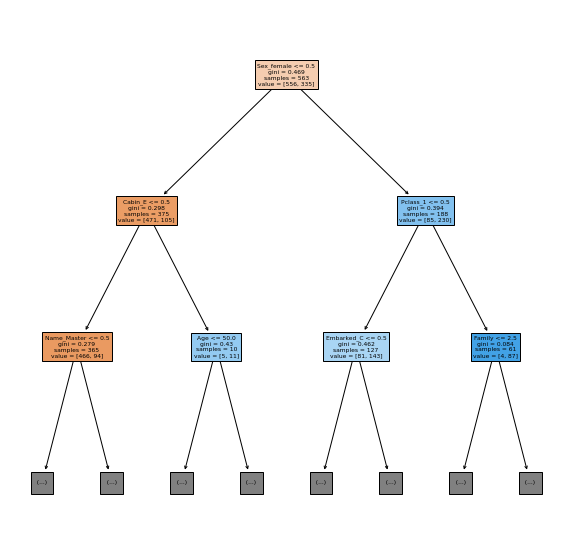

In [ ]:
# 少了訓練資料，後面教另一個方式做。(之前做的太靠運氣選資料了)

# 隨機森林
from sklearn.ensemble import RandomForestClassifier

# 先10個決策樹
clf = RandomForestClassifier(n_estimators=10, max_depth=5, n_jobs=-1)
clf.fit(x, y)

# 畫圖看一下"略有不同"
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10, 10))

# 個別看第n棵的圖 (分類方式會有"略有不同")
# 你可以挑選十棵裡面的某棵把它畫出來, 看一下什麼叫做略有不同
# clf.estimators_[第幾棵]
plot_tree(clf.estimators_[3], feature_names=datas.columns, filled=True, max_depth=2)

In [ ]:
# 做訓練資料: 使用交叉驗證 (做10次)
from sklearn.model_selection import cross_val_score

# 調看看隨機森林參數，看分數有沒有比較好
# 1.max_depth: 調看看深度
# 2.n_estimators: 後面介紹內建工具，讓系統幫我們選最好的.
clf = RandomForestClassifier(n_estimators=133, max_depth=6)
scores = cross_val_score(clf, x, y, cv=10, n_jobs=-1)

# 可以多跑幾次，看平均值是否差不多
print(scores)
print(np.average(scores))

[0.82222222 0.88764045 0.75280899 0.87640449 0.85393258 0.82022472
 0.84269663 0.78651685 0.86516854 0.83146067]
0.8339076154806492


In [ ]:
# 使用內建工具(GridSearchCV): 幫你測試參數要設多少
# 相當於迴圈的概念
"""
from sklearn.model_selection import GridSearchCV
clf = RandomForestClassifier()
params = {
    "n_estimators":range(11, 150, 2),
    "max_depth":[5, 6, 7, 8, 9, 10]
}
cv = GridSearchCV(clf, params, cv=10, n_jobs=-1)
cv.fit(x, y)
"""

'\nfrom sklearn.model_selection import GridSearchCV\nclf = RandomForestClassifier()\nparams = {\n    "n_estimators":range(11, 150, 2),\n    "max_depth":[5, 6, 7, 8, 9, 10]\n}\ncv = GridSearchCV(clf, params, cv=10, n_jobs=-1)\ncv.fit(x, y)\n'

In [ ]:
# 查看剛剛跑完的結果
"""
cv.best_params_
"""
# 回到上面交叉驗證測試結果值
# 1次改1個參數, 看結果.
# 1.n_estimators: 固定後不太用調，差異不大.
# 2.max_depth: 若差異不大, 選用小的較好, "避免過擬和".

'\ncv.best_params_\n'

In [ ]:
# 輸出結果rf.csv
# 上傳至Kaggle提交結果看分數
# Score: 0.78468
clf = RandomForestClassifier(n_estimators=133, max_depth=6)
clf.fit(x, y)
pre = clf.predict(x_predict)
df = pd.DataFrame({
    "PassengerId":predict_df["PassengerId"],
    "Survived":pre
})
df.to_csv("rf.csv", encoding="utf-8", index=False)
df

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


# 接下來要做的讓Kaggle分數更好

In [ ]:
# 讓單位一致: Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
datas_scale = scaler.fit_transform(datas)
# 已經是np array, 所以不是用.iloc(pandas)
x_scale = datas_scale[:len(train_df)]
x_predict_scale = datas_scale[len(train_df):]

In [ ]:
# 再使用另一個演算法: KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
clf = KNeighborsClassifier()
params = {
    "n_neighbors":range(5, 100)
}
cv = GridSearchCV(clf, params, cv=10, n_jobs=-1)
cv.fit(x_scale, y)
print(cv.best_params_)
print(cv.best_score_)

{'n_neighbors': 7}
0.832796504369538


In [ ]:
# 手動調整參數 (老師已測過11最好)
clf = KNeighborsClassifier(n_neighbors=11)
clf.fit(x_scale, y)
pre = clf.predict(x_predict_scale)
df = pd.DataFrame({
    "PassengerId":predict_df["PassengerId"],
    "Survived":pre
})
df.to_csv("knn.csv", encoding="utf-8", index=False)
df

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
# 處理更詳盡, maybe可以試試 ticket-SibSp-Parch (同學提出的可以看: 朋友中是否有親屬關係 是否有影響)

# 再做圖的分析

In [ ]:
clf = RandomForestClassifier(n_estimators=51, max_depth=6)
clf.fit(x, y)
pre = clf.predict(x_predict)
df = pd.DataFrame({
    "PassengerId":predict_df["PassengerId"],
    "Survived":pre
})
df.to_csv("rf.csv", encoding="utf-8", index=False)
df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
# 叫出隨機森林特徵值
# 排序+倒排序
pd.DataFrame({
    "importance":clf.feature_importances_
}, index=datas.columns).sort_values(by="importance", ascending=False)

,importance
Sex_male,0.160429
Sex_female,0.151917
Name_Mr,0.110676
Fare,0.097686
Pclass_3,0.070288
Age,0.058909
Ticket,0.053613
Name_Mrs,0.053439
Name_Miss,0.042308
Family,0.041543


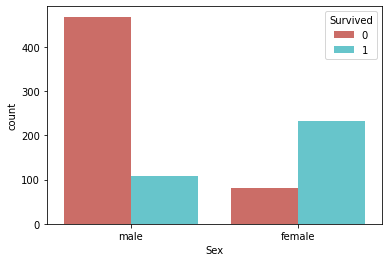

In [ ]:
# 畫直方圖
# palette選顏色
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x=train_df["Sex"], hue=train_df["Survived"], palette=sns.color_palette("hls", 2))

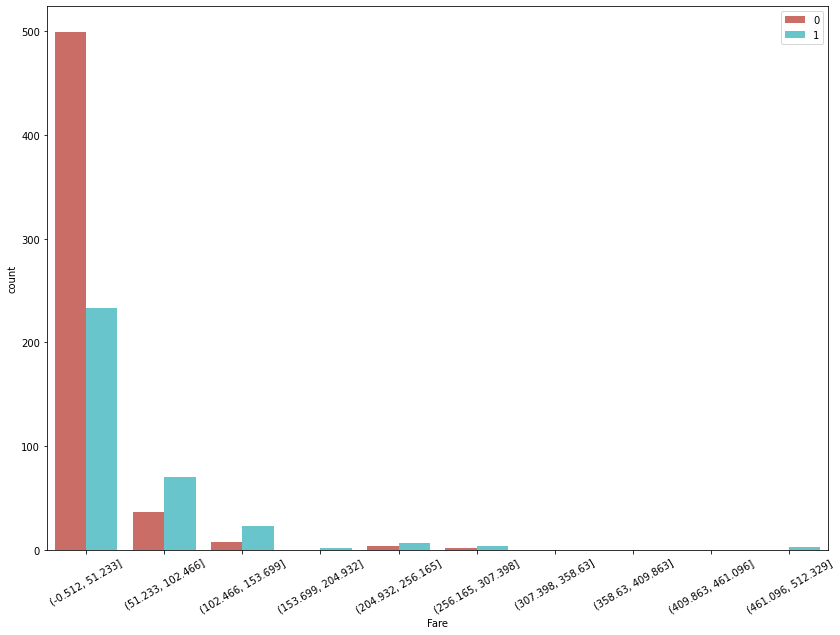

In [ ]:
# 連續的數值 (欄位Fare)
# ->使用pandas的cut
plt.figure(figsize=(14, 10))
fcut = pd.cut(train_df["Fare"], 10)

# 調整圖片大小
# 越有錢, 活的比例越高.(可能有錢的救生艇越多) 但有趣的是:
# 實際上船上的世界第一跟第二首富選擇讓位, 邊喝著紅酒邊沉下去. (也許是已經體驗完人生沒什麼好留念)
sns.countplot(x=fcut, hue=train_df["Survived"], palette=sns.color_palette("hls", 2))
plt.xticks(rotation=30)
plt.legend(loc="upper right")

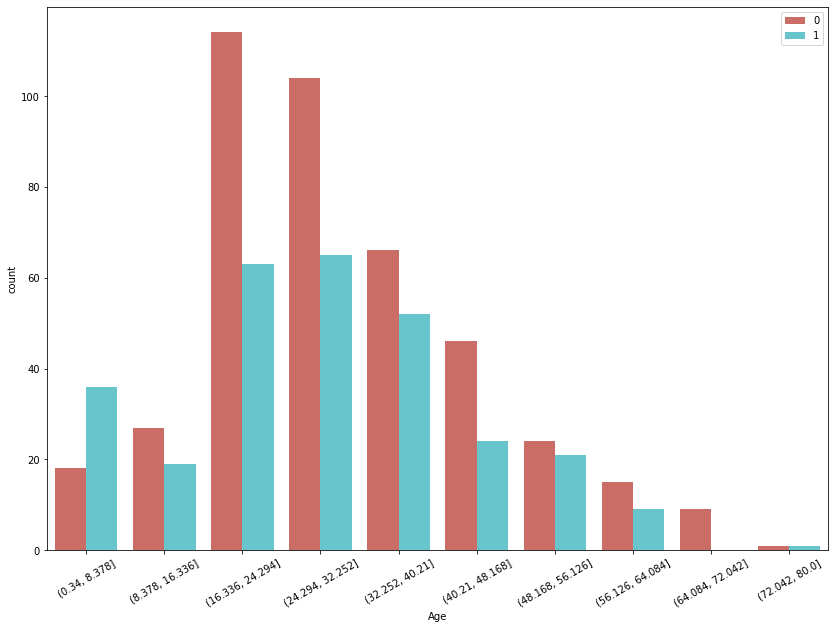

In [ ]:
# 看年齡
plt.figure(figsize=(14, 10))
fcut = pd.cut(train_df["Age"], 10)
sns.countplot(x=fcut, hue=train_df["Survived"], palette=sns.color_palette("hls", 2))
plt.xticks(rotation=30)
plt.legend(loc="upper right")